# Somme de carrés

## Exercice

On considère la forme quadratique sur $\mathbb{R}^4$ définie par
$$\forall(x,y,z,t)\in\mathbb{R}^4,\; q(x,y,z,t)=2\, t^{2} + 4\, t\, y - 4\, t\, z + 2\, x^{2} + y^{2} - 6\, y\, z + z^{2}$$
1. Calculer sa signature (*sans machine*), à l'aide de l'algorithme de Gauss.
1. Vérifier le calcul avec `sympy`.
1. En déduire une base $q$-orthogonale.
1. À l'aide de la matrice de passage de la base canonique et de la base trouvée, trouver la matrice de $q$ dans la nouvelle base.

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
x, y, z, t = sp.symbols('x y z t', real=True)

In [3]:
q1 = 2*t**2+4*t*y-4*t*z+2*x**2+y**2-6*y*z+z**2
q1

**Question 1**

On applique l'algorithme de Gauss.
$$q(x,y,z,t)=2\,\left(t+y-z\right)^2+2\,x^2+y^2-6\,y\,z+z^2-2\,\left(y-z\right)^2$$
en développant
$$q(x,y,z,t)=2\,\left(t+y-z\right)^2+2\,x^2-y^2-4\,y\,z-z^2$$
et, donc
$$q(x,y,z,t)=2\,\left(t+y-z\right)^2+2\,x^2-\left(y+z\right)^2$$
La signature est donc $(2,1)$.

**Question 2**

In [4]:
(q1-2*(t+y-z)**2-2*x**2+(y+z)**2).expand()

**Question 3**

On a donc apparition de 3 formes linéaires indépendantes
$$\begin{cases} \varphi_1\;:&(x,y,z,t)\longmapsto \sqrt{2}\,\left(t+y-z\right) \\ \varphi_2\;:&(x,y,z,t)\longmapsto \sqrt{2}\,x\\ \varphi_3\;:&(x,y,z,t)\longmapsto y+z\end{cases}$$
On complète cette famille libre avec (par exemple) $\varphi_4\;:\;(x,y,z,t)\longmapsto y$, puis on cherche la base ante-duale. 

In [5]:
phi1 = sp.sqrt(2)*(t+y-z)
phi2 = sp.sqrt(2)*x
phi3 = y+z
phi4 = y

In [6]:
X = sp.Matrix([x, y, z, t])
E1 = X.subs(sp.solve([phi1-1, phi2, phi3, phi4], [x, y, z, t]))
E2 = X.subs(sp.solve([phi1, phi2-1, phi3, phi4], [x, y, z, t]))
E3 = X.subs(sp.solve([phi1, phi2, phi3-1, phi4], [x, y, z, t]))
E4 = X.subs(sp.solve([phi1, phi2, phi3, phi4-1], [x, y, z, t]))

In [7]:
# Vérification
def qval(q, X):
    return q.subs({x: X[0, 0], y: X[1, 0], z: X[2, 0], t: X[3, 0]}).expand()


def Bval(q, X, Y):
    return (qval(q, X+Y)-qval(q, X)-qval(q, Y))/2

In [8]:
base = [E1, E2, E3, E4]
[Bval(q1, X, Y) for X in base for Y in base]

**Question 4**

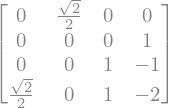

In [9]:
P = (sp.Matrix([E1, E2, E3, E4]).reshape(4, 4)).transpose()
P

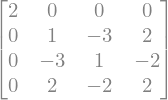

In [10]:
Mq = sp.Matrix([[2, 0, 0, 0], [0, 1, -3, 2], [0, -3, 1, -2], [0, 2, -2, 2]])
Mq

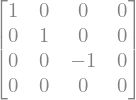

In [11]:
P.transpose()@Mq@P

## Exercice

Soit $E$ un $\mathbb{R}$-espace vectoriel de dimension finie $d\ge 2$. Soit $q$ une forme quadratique *non dégénérée*. Soit $e\in E$ un vecteur isotrope non nul.
1. Montrer qu'il existe $y\in E$, tel que
    - $(e,y)$ est une famille libre ;
    - $q(y)=0$.
1. Montrer l'existence d'une base $(e_1,\ldots,e_d)$ de $E$ qui vérifie 
$$\forall k\in\{1,\ldots,d\},\; q\left(e_k\right)=0$$
1. Trouver une telle base pour la forme quadratique sur $\mathbb{R}^4$ définie par
$$\forall(x,y,z,t)\in\mathbb{R}^4,\; q(x,y,z,t)=- 6\, t^{2} + 8\, t\, x + 4\, t\, y - 4\, t\, z - 2\, x^{2} - 4\, x\, y - 4\, y\, z + 2\, z^{2}$$

In [12]:
q2 = -6*t**2+8*t*x+4*t*y-4*t*z-2*x**2-4*x*y-4*y*z+2*z**2
q2

**Question 1**

Comme la forme quadratique $q$ est non dégénérée, il existe un vecteur $b$ tel que $B(e,b)\ne0$ et $(e,b)$ est donc libre. Cherchons alors $y$ sous la forme $\lambda.e+b$, pour un $\lambda\in\mathbb{R}$. Comme
$$q(\lambda.e+b)=\lambda^2\,q(e)+2\,\lambda\,B(e,b)+q(b)=2\,\lambda\,B(e,b)+q(b)$$
on voit qu'il suffit de prendre
$$y=b-\frac{q(b)}{2\,B(e,b)}.e$$

**Question 2**

On procède par récurrence sur $d$. Sans rédiger la récurrence, on va présenter l'algorithme de calcul (à vous de rédiger la récurrence).
1. Pour $e_1$, on prend n'importe quel vecteur isotrope non nul.
1. Supposons $(e_1,\ldots,e_k)$ construits, pour $k\ge1$, $k<d$, alors on considère un vecteur
$$b_k\notin \mathrm{Vect}\left(\{e_1,\ldots,e_{k}\}\right)\cup {\mathbb{R}.e_k}^{\bot_q}$$
ce qui est possible car *une réunion de deux sous-espaces vectoriels ne peut être égale à tout $E$, à moins que l'un des deux sous-espaces soit tout $E$*, or
$$\mathrm{Vect}\left(\{e_1,\ldots,e_{k}\}\right)\ne E \text{ car $k<d$}$$
et
$${\mathbb{R}.e_k}^{\bot_q}\ne E \text{ car $q$ est non dégénérée}$$
1. Puis on construit $e_{k+1}$ en le cherchant (comme à la question précédente) sous la forme $\lambda.e_k+b_k$, on trouve alors
$$e_{k+1}=b_k-\frac{q(b_k)}{2\,B(e_k,b_k)}.e_k$$

**Question 3**

On suit l'algorithme.

In [13]:
q2

In [14]:
# E1 = (0,1,0,0), il n'y a pas de terme en y^2
E1 = sp.Matrix([0, 1, 0, 0])
qval(q2, E1)

In [15]:
# Orthogonal de E1
Bval(q2, E1, X)

In [16]:
# B1 quelconque qui n'est pas dans ce sous-espace vectoriel
B1 = sp.Matrix([1, 0, 0, 0])
E2 = B1-qval(q2, B1)/Bval(q2, E1, B1)/2*E1
qval(q2, E2)

In [17]:
# Orthogonal de E2
Bval(q2, E2, X)

In [18]:
# Choix de B2, qui ne doit pas être dans l'orthogonal, ni dans Vect({E1,E2})
B2 = sp.Matrix([0, 0, 1, 0])
E3 = B2-qval(q2, B2)/Bval(q2, E2, B2)/2*E2
qval(q2, E3)

In [19]:
# Orthogonal de E3
Bval(q2, E3, X)

In [20]:
# Choix de B3
B3 = sp.Matrix([0, 0, 0, 1])
E4 = B3-qval(q2, B3)/Bval(q2, E3, B3)/2*E3
qval(q2, E4)

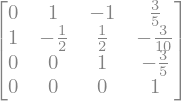

In [21]:
# Vérification que c'est bien une base
sp.Matrix([E1, E2, E3, E4]).reshape(4, 4).transpose()

In [22]:
_.det()

## Exercice

On considère la fonction définie sur $\mathbb{R}^4$ par
$$\forall(x,y,z,t)\in\mathbb{R}^4,\; f(x,y,z,t)=2 t^{4} + 4 t^{3} x + 8 t^{3} y - 8 t^{3} z - 8 t^{3} + 6 t^{2} x^{2} + 24 t^{2} x y - 12 t^{2} x z - 12 t^{2} x + 24 t^{2} y^{2} - 24 t^{2} y z - 24 t^{2} y + 12 t^{2} z^{2} + 24 t^{2} z + 14 t^{2} + 4 t x^{3} + 24 t x^{2} y - 12 t x^{2} z - 12 t x^{2} + 48 t x y^{2} - 48 t x y z - 48 t x y + 12 t x z^{2} + 24 t x z + 14 t x + 32 t y^{3} - 48 t y^{2} z - 48 t y^{2} + 24 t y z^{2} + 48 t y z + 28 t y - 8 t z^{3} - 24 t z^{2} - 28 t z - 12 t + x^{4} + 8 x^{3} y - 4 x^{3} z - 4 x^{3} + 24 x^{2} y^{2} - 24 x^{2} y z - 24 x^{2} y + 6 x^{2} z^{2} + 12 x^{2} z + 11 x^{2} + 32 x y^{3} - 48 x y^{2} z - 48 x y^{2} + 24 x y z^{2} + 48 x y z + 36 x y - 4 x z^{3} - 12 x z^{2} - 16 x z - 10 x + 16 y^{4} - 32 y^{3} z - 32 y^{3} + 24 y^{2} z^{2} + 48 y^{2} z + 32 y^{2} - 8 y z^{3} - 24 y z^{2} - 30 y z - 16 y + 2 z^{4} + 8 z^{3} + 15 z^{2} + 10 z + 8$$
1. Quels sont les candidats extremums ?
1. Parmi ces candidats, quels sont les extremums locaux.
1. Y a-t-il des extremums globaux ? Justifier.

In [23]:
f = 2*t**4 + 4*t**3*x + 8*t**3*y - 8*t**3*z - 8*t**3 + 6*t**2*x**2 + 24*t**2*x*y - 12*t**2*x*z - 12*t**2*x + 24*t**2*y**2 - 24*t**2*y*z - 24*t**2*y + 12*t**2*z**2 + 24*t**2*z + 14*t**2 + 4*t*x**3 + 24*t*x**2*y - 12*t*x**2*z - 12*t*x**2 + 48*t*x*y**2 - 48*t*x*y*z - 48*t*x*y + 12*t*x*z**2 + 24*t*x*z + 14*t*x + 32*t*y**3 - 48*t*y**2*z - 48*t*y**2 + 24*t*y*z**2 + 48*t*y*z + 28*t*y - 8*t*z**3 - 24 * \
    t*z**2 - 28*t*z - 12*t + x**4 + 8*x**3*y - 4*x**3*z - 4*x**3 + 24*x**2*y**2 - 24*x**2*y*z - 24*x**2*y + 6*x**2*z**2 + 12*x**2*z + 11*x**2 + 32*x*y**3 - 48*x*y**2*z - 48*x*y**2 + 24*x*y*z**2 + 48*x * \
    y*z + 36*x*y - 4*x*z**3 - 12*x*z**2 - 16*x*z - 10*x + 16*y**4 - 32*y**3*z - 32*y**3 + 24*y**2*z**2 + \
    48*y**2*z + 32*y**2 - 8*y*z**3 - 24*y*z**2 - 30*y * \
    z - 16*y + 2*z**4 + 8*z**3 + 15*z**2 + 10*z + 8

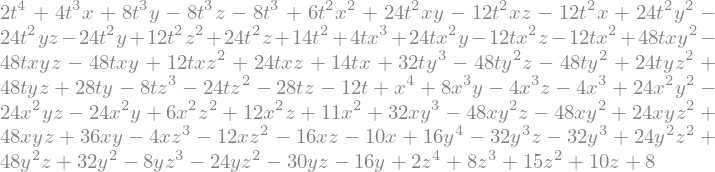

In [24]:
f

**Question 1**

Recherche des candidats extremums. Ils doivent vérifier
$$\mathrm{d}f_{(x,y,z,t)}=0_{_{\mathscr{L}\left(\mathbb{R}^4,\mathbb{R}\right)}}$$

In [25]:
sp.solve([f.diff(x), f.diff(y), f.diff(z), f.diff(t)], [x, y, z, t])

**Question 2**

Un seul candidat, regardons le comportement de la fonction au voisinage du point trouvé.

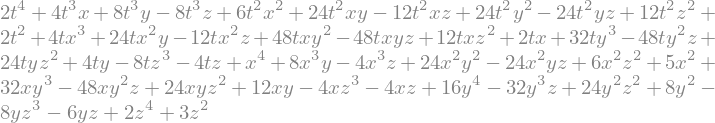

In [26]:
(f.subs({x: 2+x, y: -1+y, z: 2+z, t: 3+t})).expand()

In [27]:
base = [x, y, z, t]
carres = sum([_.coeff(i, 2).subs({x: 0, y: 0, z: 0, t: 0})*i**2 for i in base])
dble = sum([_.coeff(base[i], 1).coeff(base[j], 1).subs(
    {x: 0, y: 0, z: 0, t: 0})*base[i]*base[j] for i in range(4) for j in range(i)])
carres+dble

Heureusement, on a la fonction *hessienne*, qui donne le double des termes de degré 2 (avec un facteur à cause du $1/2$ du développement limité à l'ordre 2).

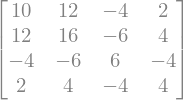

In [28]:
sp.hessian(f, X).subs({x: 2, y: -1, z: 2, t: 3})

In [29]:
H = _
((X.transpose())@H@X)[0].expand()

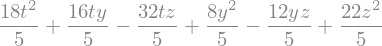

In [30]:
(_-10*(x+t/5+6*y/5-2*z/5)**2).expand()

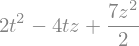

In [31]:
(_-sp.S(8)/5*(y+t-3*z/4)**2).expand()

In [32]:
(_-2*(t-z)**2).expand()

La signature est $(4,0)$, la forme quadratique est définie positive, le point est donc un *minimum* local.

**Question 3**

Le principe est le suivant (voir le cours de topologie)
1. On montre que
$$f(x,y,z,t)\xrightarrow[\|(x,y,z,t)\|\to+\infty]{}+\infty$$
1. Il existe donc un $R>0$, tel que
$$\forall(x,y,z,t)\in\mathbb{R}^4,\; \left[\|(x,y,z,t)\|\ge R\right]\implies\left[f(x,y,z,t)\ge 1+f(0,0,0,0)\right]$$
Le point $(0,0,0,0)$ pris ici comme référence pouvant être quelconque.
1. Comme la boule fermée $BF\left(\underline{0},R\right)$ est compacte (nous sommes en dimension finie !), la restriction de $f$ à cette boule aura un minimum et un maximum, car $f$ est continue.
1. Ce minimum n'étant pas atteint sur la sphère $S\left(\underline{0},R\right)$, ce sera un minimum global.
1. Il n'y a qu'un seul candidat possible. $(2,-1,2,3)$ est donc un minimum global !